In [12]:
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt
from google.colab import files

# Upload files
print("Please upload the CSV file for edges.")
edges_file = files.upload()
print("Please upload the JSON file for genres.")
genres_file = files.upload()

# Load data
edges = pd.read_csv(next(iter(edges_file.keys())))
with open(next(iter(genres_file.keys())), 'r') as f:
    genres = json.load(f)

Please upload the CSV file for edges.


Saving RO_edges.csv to RO_edges (2).csv
Please upload the JSON file for genres.


Saving RO_genres.json to RO_genres (2).json


Most central genres: [('Pop', 33420), ('Dance', 21208), ('Rap/Hip Hop', 18849), ('Rock', 16630), ('Electro', 16550), ('Alternative', 14966), ('R&B', 11933), ('International Pop', 11620), ('Indie Rock', 7365), ('Films/Games', 7353)]


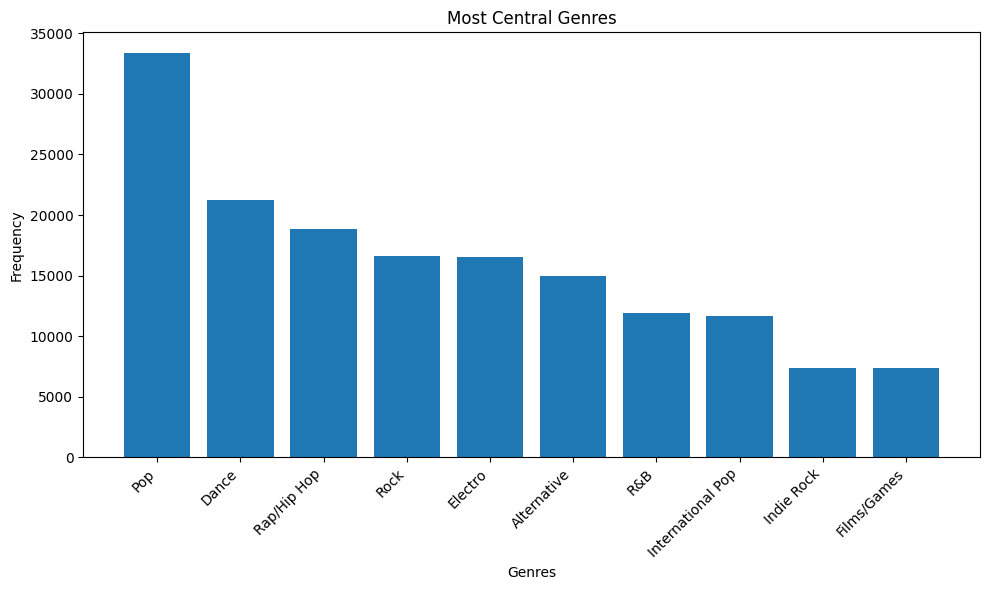

In [13]:
# Question 1: Most Central Musical Genres
user_genre_counts = Counter()
for user, genre_list in genres.items():
    user_genre_counts.update(genre_list)

# get the most central genres
most_central_genres = user_genre_counts.most_common(10)
print("Most central genres:", most_central_genres)

genres_list, counts = zip(*most_central_genres)
plt.figure(figsize=(10, 6))
plt.bar(genres_list, counts)
plt.title("Most Central Genres")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

This chart highlights the genres most frequently liked by users, indicating their strong presence within the community.


Genres shared across users: [('Pop', 80852), ('Dance', 34419), ('Rap/Hip Hop', 29827), ('Rock', 21892), ('Electro', 21560), ('Alternative', 19795), ('R&B', 11822), ('International Pop', 11163), ('Indie Rock', 5523), ('Films/Games', 4649)]


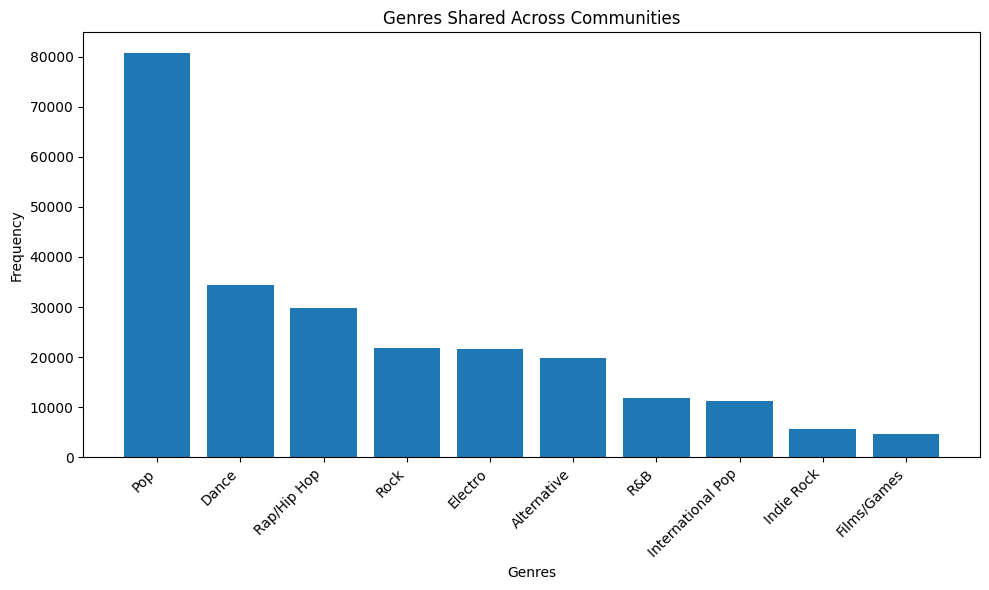

In [14]:
# Question 2: Genres Shared Across Communities
shared_genres = Counter()

# find genres common to multiple users
for source, target in zip(edges['node_1'], edges['node_2']):
    source_genres = set(genres.get(str(source), []))
    target_genres = set(genres.get(str(target), []))
    shared_genres.update(source_genres & target_genres)

shared_genres_top = shared_genres.most_common(10)
print("Genres shared across users:", shared_genres_top)

genres_list, counts = zip(*shared_genres_top)
plt.figure(figsize=(10, 6))
plt.bar(genres_list, counts)
plt.title("Genres Shared Across Communities")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


This chart highlights genres that act as bridges, being commonly liked across communities. These genres facilitate cross-community interactions.

Genres influenced by high-degree users: [('Pop', 8), ('Rock', 7), ('Indie Rock', 6), ('Dance', 6), ('Alternative', 6), ('Rap/Hip Hop', 5), ('International Pop', 5), ('Films/Games', 3), ('Film Scores', 3), ('Indie Pop', 3)]


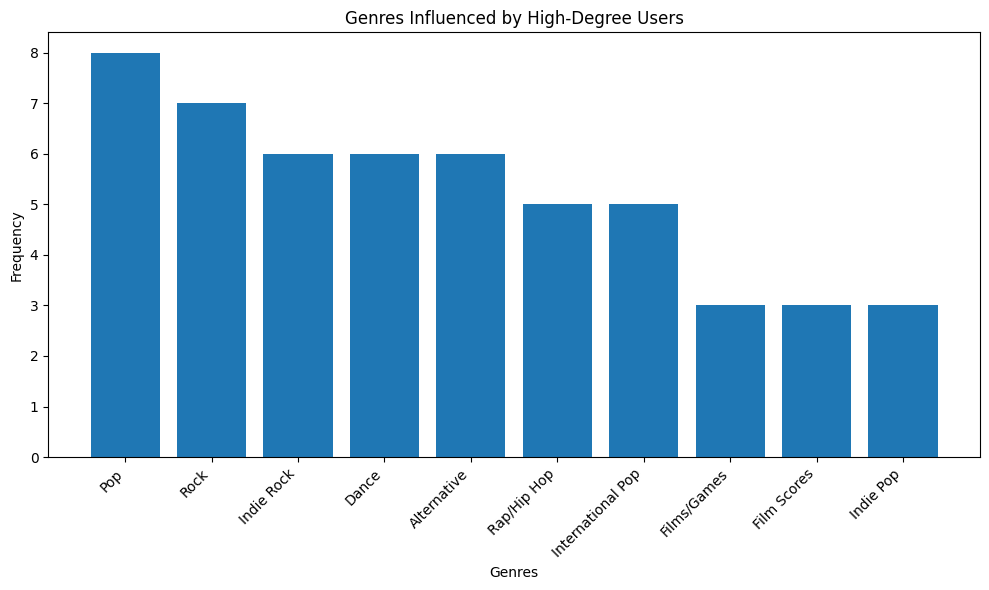

In [15]:
# Question 4: Influence of High-Degree Users
high_degree_counts = Counter(edges['node_1'].tolist() + edges['node_2'].tolist())
high_degree_users = high_degree_counts.most_common(10)
high_degree_genres = Counter()

for user, _ in high_degree_users:
    high_degree_genres.update(genres.get(str(user), []))

# get the most influenced genres
influenced_genres = high_degree_genres.most_common(10)
print("Genres influenced by high-degree users:", influenced_genres)

genres_list, counts = zip(*influenced_genres)
plt.figure(figsize=(10, 6))
plt.bar(genres_list, counts)
plt.title("Genres Influenced by High-Degree Users")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

This chart shows genres that are widely promoted by users with many connections, indicating their influence within the network.

Most diverse users: [('30424', 52), ('33332', 48), ('36753', 48), ('12497', 47), ('16193', 46), ('756', 45), ('1956', 44), ('20867', 44), ('25569', 44), ('12210', 43)]
Genres promoted by diverse users: [('Pop', 16395), ('Dance', 13604), ('Rock', 12135), ('Electro', 12132), ('Rap/Hip Hop', 12012), ('Alternative', 11771), ('R&B', 9862), ('International Pop', 9314), ('Indie Rock', 6975), ('Films/Games', 6419)]


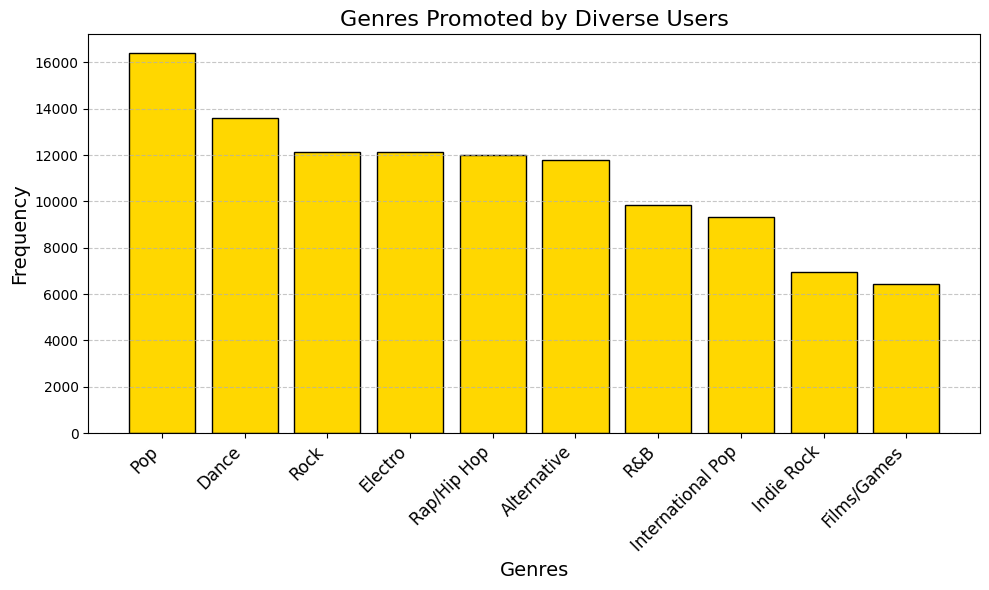

In [17]:
# Question 5: Influence of Diverse Users

def calculate_diversity(genre_list):
    return len(set(genre_list))

user_diversity = {user: calculate_diversity(genre_list) for user, genre_list in genres.items()}
most_diverse_users = sorted(user_diversity.items(), key=lambda x: x[1], reverse=True)[:10]
print("Most diverse users:", most_diverse_users)

# analyze genres promoted by diverse users
diverse_users = [user for user, diversity in user_diversity.items() if diversity > 5]
diverse_genres = Counter()
for user in diverse_users:
    diverse_genres.update(genres.get(str(user), []))

diverse_genres_top = diverse_genres.most_common(10)
print("Genres promoted by diverse users:", diverse_genres_top)

genres_list, counts = zip(*diverse_genres_top)
plt.figure(figsize=(10, 6))
plt.bar(genres_list, counts, color='gold', edgecolor='black')
plt.title("Genres Promoted by Diverse Users", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This chart highlights the impact of users with diverse musical preferences on genre promotion and cross-community interactions. Diverse users, who appreciate a wide range of genres, act as connectors within the network by promoting genre variety.